# Nasdaq Composite 日足 メディアン統計

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

code = 'IXIC'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='1y', interval='1d')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-21 00:00:00-04:00,16517.240234,16538.859375,16393.900391,16401.839844,5134740000,0.0,0.0
2024-03-22 00:00:00-04:00,16387.830078,16467.619141,16361.000000,16428.820312,4339930000,0.0,0.0
2024-03-25 00:00:00-04:00,16335.299805,16441.169922,16315.719727,16384.470703,4636940000,0.0,0.0
2024-03-26 00:00:00-04:00,16446.849609,16476.380859,16312.950195,16315.700195,5144260000,0.0,0.0
2024-03-27 00:00:00-04:00,16424.759766,16431.820312,16279.169922,16399.519531,4768930000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-14 00:00:00-04:00,17523.300781,17773.480469,17491.080078,17754.089844,7093850000,0.0,0.0
2025-03-17 00:00:00-04:00,17722.539062,17925.939453,17645.869141,17808.660156,6306340000,0.0,0.0
2025-03-18 00:00:00-04:00,17662.570312,17682.919922,17431.669922,17504.119141,6450530000,0.0,0.0


In [3]:
df0 = ticker.history(period='3y', interval='1d')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-21 00:00:00-04:00,13860.389648,13945.809570,13682.549805,13838.459961,5673940000,0.0,0.0
2022-03-22 00:00:00-04:00,13866.429688,14141.070312,13857.290039,14108.820312,5445100000,0.0,0.0
2022-03-23 00:00:00-04:00,13990.349609,14152.139648,13921.650391,13922.599609,5024230000,0.0,0.0
2022-03-24 00:00:00-04:00,14001.320312,14193.549805,13897.200195,14191.839844,5149520000,0.0,0.0
2022-03-25 00:00:00-04:00,14194.719727,14218.759766,14010.790039,14169.299805,5585100000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-14 00:00:00-04:00,17523.300781,17773.480469,17491.080078,17754.089844,7093850000,0.0,0.0
2025-03-17 00:00:00-04:00,17722.539062,17925.939453,17645.869141,17808.660156,6306340000,0.0,0.0
2025-03-18 00:00:00-04:00,17662.570312,17682.919922,17431.669922,17504.119141,6450530000,0.0,0.0


## Moving Median

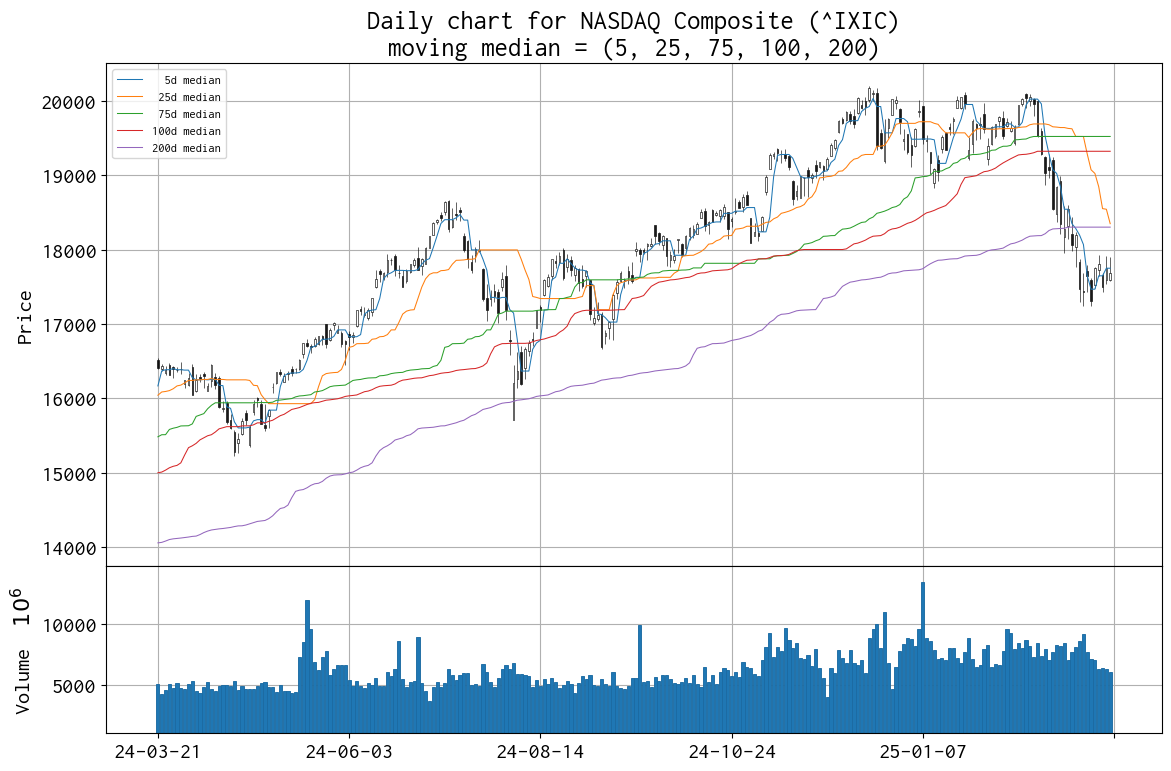

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm005 = df0['Close'].rolling(5).median()
mm025 = df0['Close'].rolling(25).median()
mm075 = df0['Close'].rolling(75).median()
mm100 = df0['Close'].rolling(100).median()
mm200 = df0['Close'].rolling(200).median()

apds  = [
    mpf.make_addplot(mm005[df.index], width=0.75, label='  5d median', ax=ax[0]),
    mpf.make_addplot(mm025[df.index], width=0.75, label=' 25d median', ax=ax[0]),
    mpf.make_addplot(mm075[df.index], width=0.75, label=' 75d median', ax=ax[0]),
    mpf.make_addplot(mm100[df.index], width=0.75, label='100d median', ax=ax[0]),
    mpf.make_addplot(mm200[df.index], width=0.75, label='200d median', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Daily chart for %s (%s)\nmoving median = (5, 25, 75, 100, 200)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('report_daily_chart_median_%s.png' % code)
plt.show()

In [5]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-19 00:00:00-04:00,17590.119141,17917.539062,17533.939453,17750.789062,6302310000,0.0,0.0
2025-03-20 00:00:00-04:00,17586.060547,17903.199219,17576.820312,17691.630859,6098330000,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-03-19 00:00:00-04:00    17750.789062
2025-03-20 00:00:00-04:00    17691.630859
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-03-19 00:00:00-04:00          NaN
2025-03-20 00:00:00-04:00   -59.158203
Name: Close, dtype: float64

In [8]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-20 00:00:00-04:00    105.570312
dtype: float64

In [9]:
df['Close'].rolling(9).median().tail()

Date
2025-03-14 00:00:00-04:00    17754.089844
2025-03-17 00:00:00-04:00    17754.089844
2025-03-18 00:00:00-04:00    17648.449219
2025-03-19 00:00:00-04:00    17648.449219
2025-03-20 00:00:00-04:00    17648.449219
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(13).median().tail()

Date
2025-03-14 00:00:00-04:00    18196.220703
2025-03-17 00:00:00-04:00    18069.259766
2025-03-18 00:00:00-04:00    17808.660156
2025-03-19 00:00:00-04:00    17754.089844
2025-03-20 00:00:00-04:00    17750.789062
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(26).median().tail()

Date
2025-03-14 00:00:00-04:00    19050.825195
2025-03-17 00:00:00-04:00    18936.834961
2025-03-18 00:00:00-04:00    18700.004883
2025-03-19 00:00:00-04:00    18548.575195
2025-03-20 00:00:00-04:00    18447.304688
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(52).median().tail()

Date
2025-03-14 00:00:00-04:00    19500.455078
2025-03-17 00:00:00-04:00    19488.234375
2025-03-18 00:00:00-04:00    19484.280273
2025-03-19 00:00:00-04:00    19484.280273
2025-03-20 00:00:00-04:00    19484.280273
Name: Close, dtype: float64

## Robust Bollinger's bands

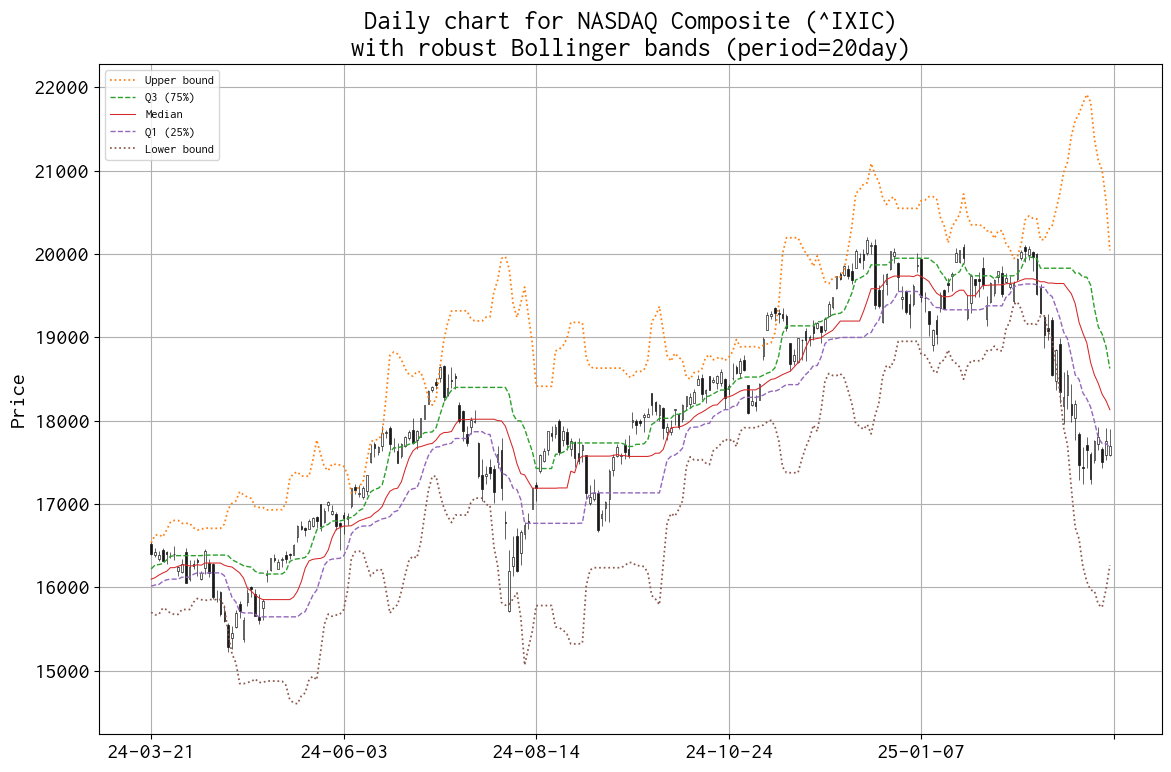

In [15]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
period = 20
mv_median = df0['Close'].rolling(period).median()
mv_q1 = df0['Close'].rolling(period).quantile(.25)
mv_q3 = df0['Close'].rolling(period).quantile(.75)
mv_iqr = mv_q3 - mv_q1
mv_lower = mv_q1 - mv_iqr * 1.5
mv_upper = mv_q3 + mv_iqr * 1.5

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Daily chart for %s (%s)\nwith robust Bollinger bands (period=%dday)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Daily chart for %s\nwith robust Bollinger bands (period=%dday)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_daily_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラム

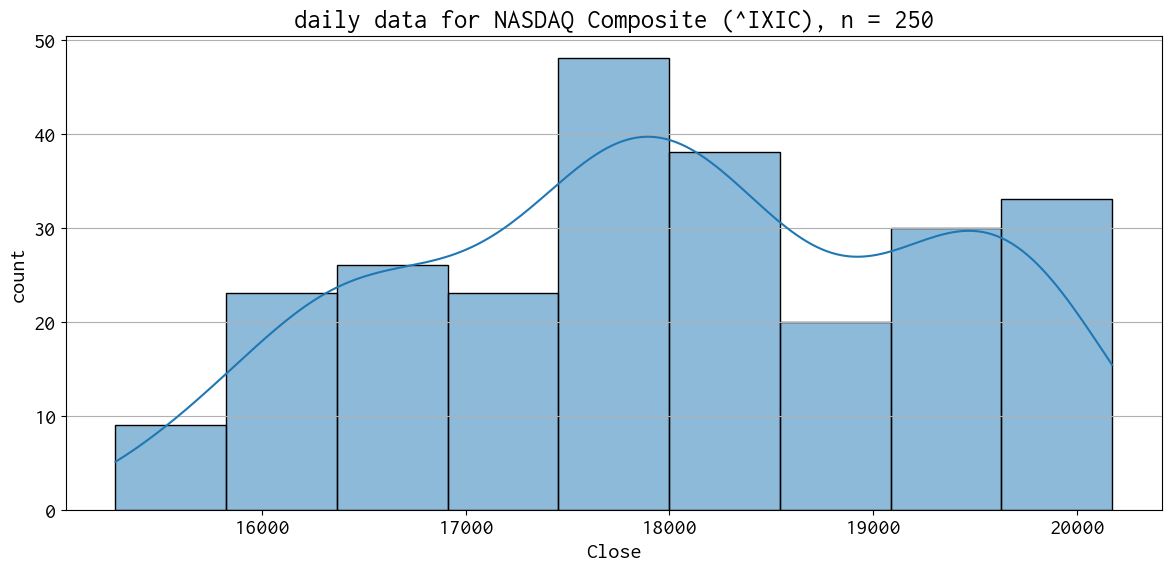

In [14]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('daily data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('report_daily_histogram_%s.png' % code)
plt.show()